from google.colab import files
uploaded = files.upload()


Saving fake reviews dataset.csv to fake reviews dataset (3).csv
🔷 SVM MODEL RESULTS 🔷
Accuracy: 0.8686781253864226
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4044
           1       0.86      0.88      0.87      4043

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



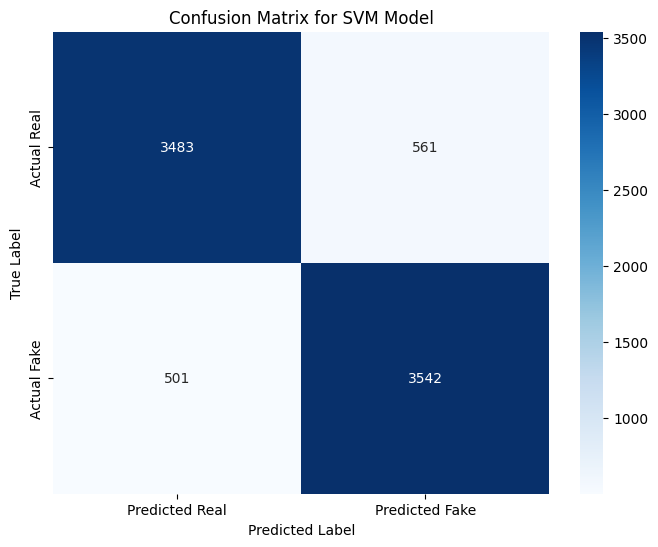

✔ Real Review
❌ Fake Review
✔ Real Review


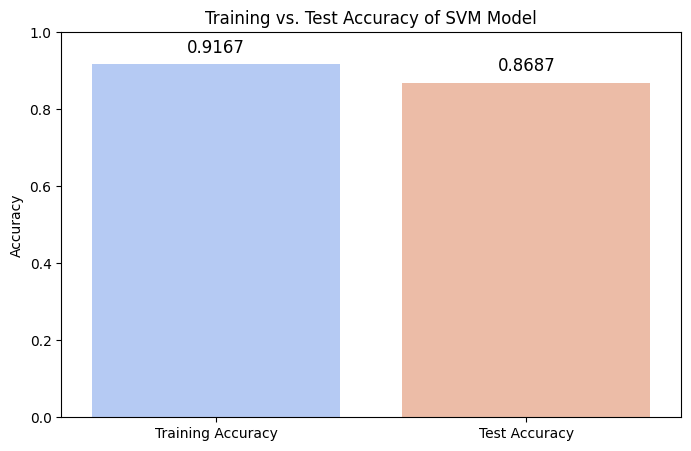

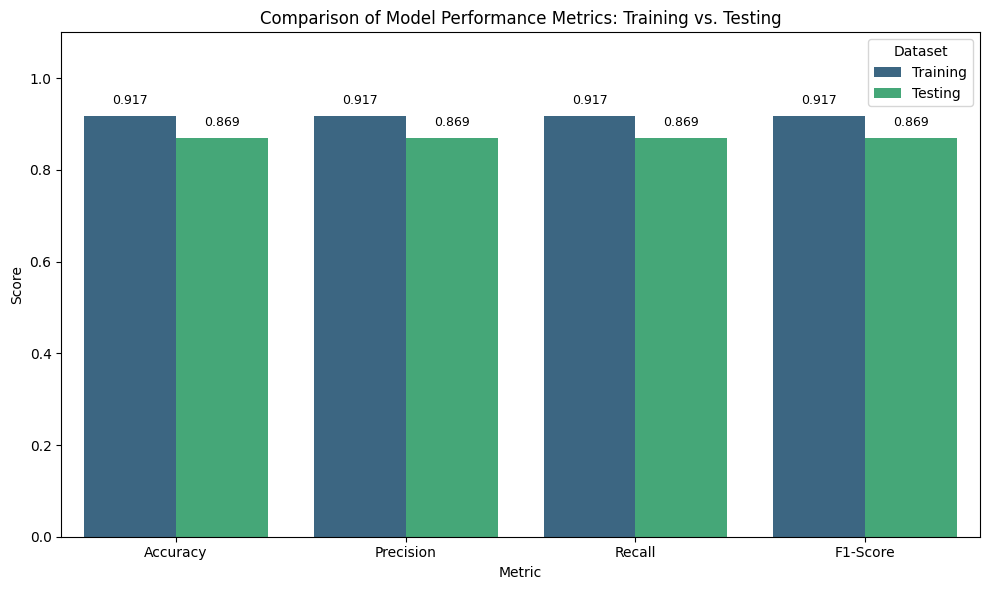

In [45]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fake reviews dataset.csv")
df.head()

df = df.dropna(subset=['text_', 'label'])
df['label'] = df['label'].astype(str)
# Convert labels to numeric (fake = 1, real = 0)
df['label_num'] = df['label'].apply(lambda x: 1 if x.lower().strip() in ['fake','cg','spam','fraud','1'] else 0)
df[['text_','label','label_num']].head()

X = df['text_']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

svm_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LinearSVC())])
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("🔷 SVM MODEL RESULTS 🔷")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Real', 'Predicted Fake'],
            yticklabels=['Actual Real', 'Actual Fake'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Test with new review
def predict_review(text):
    prediction = svm_model.predict([text])[0]
    if prediction == 1:
        return "❌ Fake Review"
    else:
        return "✔ Real Review"

# Example tests
print(predict_review("This product is Okay! Highly recommended."))
print(predict_review("Great product, must buy, very nice, good"))
print(predict_review("Worst product ever, don't buy. Total scam."))

# Get predictions on the training set
y_pred_train = svm_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)

# Get the previously calculated test accuracy
test_accuracy = accuracy_score(y_test, y_pred_svm)

# Prepare data for plotting
accuracy_labels = ['Training Accuracy', 'Test Accuracy']
accuracy_values = [train_accuracy, test_accuracy]

# Create a bar plot for comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=accuracy_labels, y=accuracy_values, hue=accuracy_labels, palette='coolwarm', legend=False)
plt.title('Training vs. Test Accuracy of SVM Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy is between 0 and 1

# Add the accuracy values on top of the bars
for index, value in enumerate(accuracy_values):
    plt.text(index, value + 0.02, f'{value:.4f}', ha='center', va='bottom', fontsize=12)
plt.show()

# --- Calculate metrics for Training Set ---
y_pred_train = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_report = classification_report(y_train, y_pred_train, output_dict=True)
train_precision_macro = train_report['macro avg']['precision']
train_recall_macro = train_report['macro avg']['recall']
train_f1_macro = train_report['macro avg']['f1-score']

# --- Calculate metrics for Test Set (already have accuracy, but recalculate for consistency) ---
test_accuracy = accuracy_score(y_test, y_pred_svm)
test_report = classification_report(y_test, y_pred_svm, output_dict=True)
test_precision_macro = test_report['macro avg']['precision']
test_recall_macro = test_report['macro avg']['recall']
test_f1_macro = test_report['macro avg']['f1-score']

# --- Prepare data for plotting ---
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'] * 2,
    'Value': [
        train_accuracy, train_precision_macro, train_recall_macro, train_f1_macro,
        test_accuracy, test_precision_macro, test_recall_macro, test_f1_macro],
    'Dataset': ['Training'] * 4 + ['Testing'] * 4
}
df_metrics = pd.DataFrame(data)

# --- Create the grouped bar chart ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Dataset', data=df_metrics, palette='viridis')
plt.title('Comparison of Model Performance Metrics: Training vs. Testing')
plt.ylabel('Score')
plt.ylim(0, 1.1) # Set y-axis limit slightly above 1 for better visibility of values

# Add value labels on top of the bars
for container in plt.gca().containers:
    for bar in container:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
                 f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=9)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()